# **Neural Network from Stratch**

#### Import and read of dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("mnist_train.csv")
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Convert data to numpy arrays.

In [2]:
data = np.array(data)
m, n = data.shape 
np.random.shuffle(data)

#### Split data for train and cross validation.

In [3]:
# Get cross-validation data
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = (X_dev - np.mean(X_dev)) / np.std(X_dev)

# Get training data
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = (X_train - np.mean(X_train)) / np.std(X_train)

# Split data in batches
def split_data_batch(X, Y, batch_size):  
    num_columns_per_split = batch_size
    num_columns = X.shape[1]
    
    X_train_batches = []
    Y_train_batches = []
    # Iterate through the columns and split the matrix into smaller matrices
    for i in range(0, num_columns, num_columns_per_split):
        X_split_matrix = X[:, i:i+num_columns_per_split]
        Y_split_matrix = Y[i:i+num_columns_per_split]
        X_train_batches.append(X_split_matrix)
        Y_train_batches.append(Y_split_matrix)        
    return X_train_batches, Y_train_batches

X_train_batches, Y_train_batches = split_data_batch(X_train, Y_train, batch_size=1000)

#### Methods to config the network.

In [4]:
def init_params(hidden_layer_size, input_size, class_num):
    W1 = 0.2 * np.random.rand(hidden_layer_size, input_size) - 0.1
    b1 = 0.2 * np.random.rand(hidden_layer_size, 1) - 0.1
    W2 = 0.2 * np.random.rand(class_num, hidden_layer_size) - 0.1
    b2 = 0.2 * np.random.rand(class_num, 1) - 0.1
    return W1, b1, W2, b2 

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_derivative(Z):
    return Z > 0

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    # Hidden layer
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    # Output layer
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
  
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    
    # Derivative of W2 and b2
    dA2 = A2 - one_hot_Y
    
    dW2 = 1 / m * dA2.dot(A1.T)
    db2 = 1 / m * np.sum(dA2)
    
    # Derivative of W1 and b1
    dZ1 = W2.T.dot(dA2) * ReLU_derivative(Z1)
    
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

#### Gradient descent algorithm implementation.

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y, print_status = True):
    if print_status:
        print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, hidden_layer_size, class_num, iterations, alpha):
    n, _ = X.shape
    W1, b1, W2, b2 = init_params(hidden_layer_size, n, class_num)
    for i in range(iterations + 1):
        # for X_batch, Y_batch in zip(X_train_batches, Y_train_batches):
        #     Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_batch)
        #     dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X_batch, Y_batch)
        #     W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2
        

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 16, 10, 1000, 0.1)
W1.tofile("W1.dat")
b1.tofile("b1.dat")
W2.tofile("W2.dat")
b2.tofile("b2.dat")

Iteration:  0
[3 3 7 ... 2 2 0] [8 9 6 ... 3 1 5]
Accuracy:  0.14510169491525424
Iteration:  50
[8 9 6 ... 3 1 5] [8 9 6 ... 3 1 5]
Accuracy:  0.8474237288135593
Iteration:  100
[3 9 6 ... 3 1 5] [8 9 6 ... 3 1 5]
Accuracy:  0.8829322033898305
Iteration:  150
[3 9 6 ... 3 1 5] [8 9 6 ... 3 1 5]
Accuracy:  0.8953728813559322
Iteration:  200
[3 9 6 ... 3 1 5] [8 9 6 ... 3 1 5]
Accuracy:  0.9042542372881356
Iteration:  250
[8 9 6 ... 3 1 5] [8 9 6 ... 3 1 5]
Accuracy:  0.9108813559322034
Iteration:  300
[8 9 6 ... 3 1 5] [8 9 6 ... 3 1 5]
Accuracy:  0.9161864406779661
Iteration:  350
[8 9 6 ... 3 1 5] [8 9 6 ... 3 1 5]
Accuracy:  0.9199830508474576
Iteration:  400
[8 9 6 ... 3 1 5] [8 9 6 ... 3 1 5]
Accuracy:  0.9232033898305084
Iteration:  450
[8 9 6 ... 3 1 5] [8 9 6 ... 3 1 5]
Accuracy:  0.9261016949152543
Iteration:  500
[8 9 6 ... 3 1 5] [8 9 6 ... 3 1 5]
Accuracy:  0.9283898305084746
Iteration:  550
[8 9 6 ... 3 1 5] [8 9 6 ... 3 1 5]
Accuracy:  0.930677966101695
Iteration:  600
[8 

#### Test now cross validation data.

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev, False)

0.935

#### View the performance on testing data.

In [8]:
data_test = pd.read_csv("mnist_test.csv")
data_test = np.array(data_test)
m, n = data.shape 
data_test = data_test.T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = (X_test - np.mean(X_test)) / np.std(X_test)

test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test, False)

0.9402

Prediction:  [1]
Label:  1


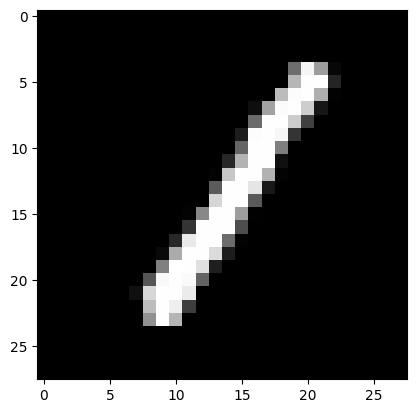

In [12]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
test_prediction(290, W1, b1, W2, b2)